# Example 03-04


$$ \max Z = 3x_1 + 4x_2 $$
subject to
\begin{align}
    5x_1 + 4x_2 &\leq 200\\
    3x_1 + 5x_2 &\leq 150\\
    5x_1 + 4x_2 &\geq 100\\
    8x_1 + 4x_2 &\geq 80\\
    x_1, x_2 & \geq 0
    \end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function domain
x = np.linspace(-10, 100, 50)

# constraints
eq1 = (200 - 5*x) / 4  # x_2 <= (200 - 5x_1) / 4
eq2 = (150 - 3*x) / 5  # x_2 <= (150 - 3x_1) / 5  
eq3 = (100 - 5*x) / 4  # x_2 >= (100 - 5x_1) / 4
eq4 = ( 80 - 8*x) / 4  # x_2 >= ( 80 - 8x_1) / 4

# z equation
zeq = lambda x1, z: (z - 3*x) / 4  # x2 = (Z - 3*x_1) / 4

# equations list
equations_list = [(x, eq1),   # x, f(x)
                  (x, eq2),
                  (x, eq3),
                  (x, eq4),
                  ]
# equations label
equations_label = [r"$5x_1 + 4x_2 \leq 200$",
                   r"$3x_1 + 5x_2 \leq 150$",
                   r"$5x_1 + 4x_2 \geq 100$",
                   r"$8x_1 + 4x_2 \geq 80$"]

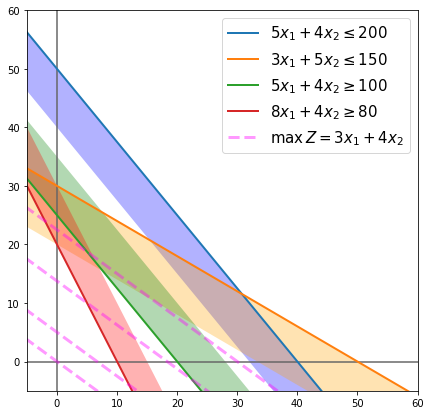

In [3]:
# ================== first plot ==================
plt.figure(figsize=(7,7))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)
# z plot
plt.plot(x, zeq(x, 0), color="magenta", lw=3, ls="--", alpha=0.4, label=r"$ \max\, Z = 3x_1 + 4x_2 $")
for i in np.linspace(20, 90, 3):
    plt.plot(x, zeq(x, i), color="magenta", lw=3, ls="--", alpha=0.4)
# areas
plt.fill_between(x, eq1, eq1 - 10, facecolor="blue", alpha=0.3)
plt.fill_between(x, eq2, eq2 - 10, facecolor="orange", alpha=0.3)
plt.fill_between(x, eq3, eq3 + 10, facecolor="green", alpha=0.3)
plt.fill_between(x, eq4, eq4 + 10, facecolor="red", alpha=0.3)
#
plt.xlim(-5, 60)
plt.ylim(-5, 60)
plt.legend(fontsize=15, loc="upper right")
plt.show()

In [4]:
# Coefficient Matrix
A = np.array([# color   Index
    [5, 4],  # blue    0
    [3, 5],  # orange  1
    [5, 4],  # green   2
    [8, 4],  # red     3
    [0, 1],  # xAxis   4
    [1, 0],  # yAxis   5
    ]
             )
# rhs vector
b = np.array([#
    200,  # b1
    150,  # b2
    100,  # b3
     80,  # b4
      0,  # xAxis
      0,  # yAxis
    ])

In [5]:
# lines intersecting each other
# equations you are interested (see the plot)
intersecting_lines = [(2, 4),  # green, xAxis 
                      (0, 4),  # blue, xAxis 
                      (0, 1),  # blue, orange
                      (1, 5),  # orange, yAxis
                      (2, 5),  # green, yAxis
                      ]

# solve equations systems and getting intersecting points
points = [np.linalg.solve(A[[*i]], b[[*i]]) for i in intersecting_lines]

# list of x-coordinates tuple and y-coordinates tuple
coordinates = [*zip(*points)]

# best zvalue and its position in the points ndarray object
best_index, best_value = max(enumerate(np.array([3, 4]).dot(point) for point in points), 
                             key=lambda t:t[1])
# coordinates of the best z value
best_point = points[best_index]

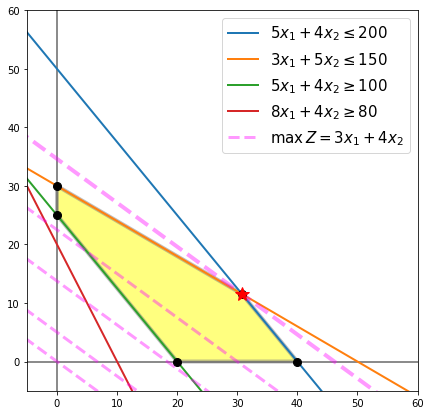

In [6]:
# ================== second plot ==================
plt.figure(figsize=(7,7))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)
# z plot
plt.plot(x, zeq(x, 0), color="magenta", lw=3, ls="--", alpha=0.4, label=r"$ \max\, Z = 3x_1 + 4x_2 $")
for i in np.linspace(20, 90, 3):
    plt.plot(x, zeq(x, i), color="magenta", lw=3, ls="--", alpha=0.4)
# best z line
plt.plot(x, zeq(x, best_value), color="magenta", lw=4, ls="--", alpha=0.4)

# intersecting points
for point in points:
    plt.plot(*point, color="k", marker="o", ms=8)

# best point (optimal solution)
plt.plot(*best_point, color="red", marker="*", ms=15)

# feasible area (polytope)
plt.fill(*coordinates, facecolor="yellow", edgecolor="gray", lw=4, alpha=0.5)

plt.xlim(-5, 60)
plt.ylim(-5, 60)
plt.legend(fontsize=15, loc="upper right")
plt.show()